### Import libraries

In [46]:
# Import necessary Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import os
import openpyxl
from openpyxl.drawing.image import Image as XLImage

### Customize 

In [47]:
# Provide customization parameters 
dataset_path = "0802 Customer Segmentation Dataset.csv"
elbow_plot_path = "0802 Elbow_Plot.png"
pca_plot_path = "0802 PCA_Plot.png"

my_report = '0802 cluster_report.csv'
my_cluster='0802 cluster_summary.csv'
my_corr_file='0802 corr_matrix.csv'
my_loadings ='0802 feature_loadings.csv'
my_features = ['Age', 'Gender', 'Annual Income', 'Spending Score', 'Purchase Frequency']

### Read and normalize data

In [48]:
# Read data
df = pd.read_csv(dataset_path)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Normalize data
X = df[my_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Use K-means, define clusters and create Elbow plot 

C:\Users\ahmed\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ahmed\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ahmed\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ahmed\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

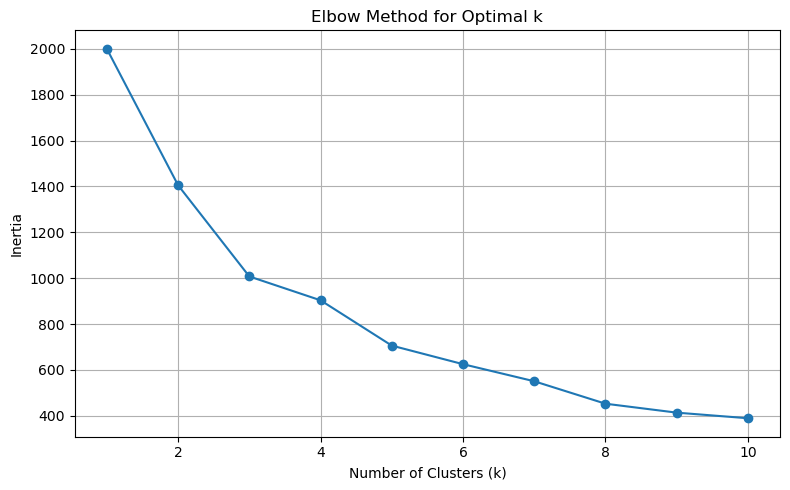

C:\Users\ahmed\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [49]:
# Elbow Method Plot

inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.savefig(elbow_plot_path)
plt.show()
plt.close()

# K-Means Clustering

optimal_k = 3  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Create cluster summary, correlation matrix
cluster_summary = df.groupby("Cluster")[my_features].mean().round(2)
corr_matrix=df[my_features].corr().round(2)

### Identify PCA and plot

Variance explained by PCA
[0.38343977 0.21644177]

Feature Loading
                        PCA1      PCA2
Age                 0.704192  0.051297
Gender              0.059748 -0.584967
Annual Income       0.132724  0.526217
Spending Score     -0.689815  0.027981
Purchase Frequency -0.084167  0.614406


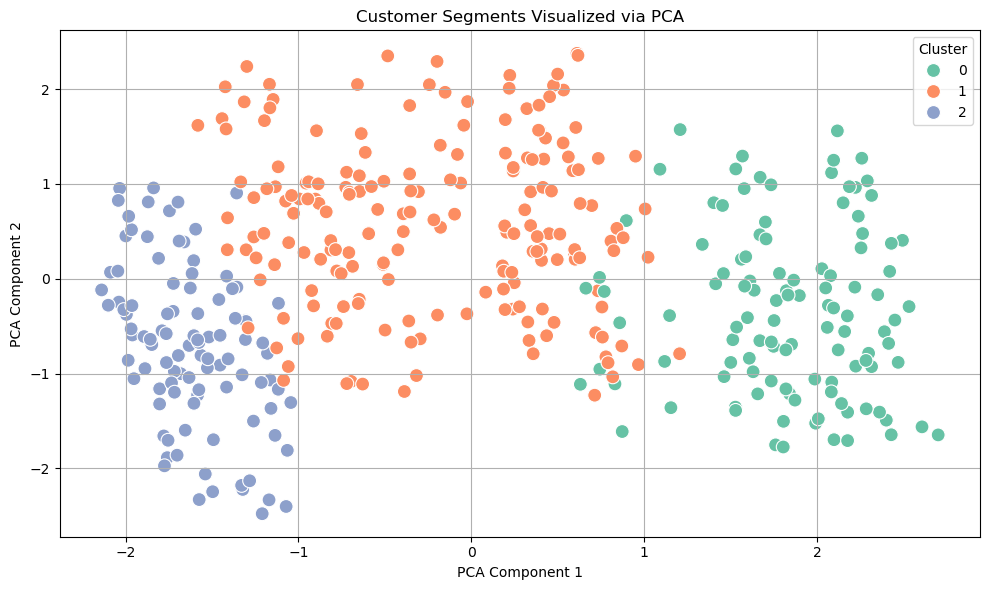

In [50]:
# PCA for 2D View

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Variance Explained by Each Component
explained_variance = pca.explained_variance_ratio_
print("Variance explained by PCA")
print(explained_variance)

loadings = pd.DataFrame(pca.components_.T,
                        columns=['PCA1', 'PCA2'],
                        index=my_features)
                        #['Age', 'Gender', 'Annual Income', 'Spending Score', 'Purchase Frequency'])

print()
print("Feature Loading")
print(loadings)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title("Customer Segments Visualized via PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.savefig(pca_plot_path)
plt.show()
plt.close()


### Save csv and plot files

In [51]:
df.to_csv(my_report,index=False)
cluster_summary.to_csv(my_cluster,index=True)
corr_matrix.to_csv(my_corr_file,index=True)
loadings.to_csv(my_loadings, index=True)

print("Output reports printed:")
print()
print(f"Saved reports: 1.{my_report}, 2.{my_cluster}, 3.{my_corr_file}, 4.{my_loadings}")
print(f"Saved plots: 1.{elbow_plot_path}, 2.{pca_plot_path}")

Output reports printed:

Saved reports: 1.0802 cluster_report.csv, 2.0802 cluster_summary.csv, 3.0802 corr_matrix.csv, 4.0802 feature_loadings.csv
Saved plots: 1.0802 Elbow_Plot.png, 2.0802 PCA_Plot.png
